In [1]:
import torch 

import torch.nn as nn 

import torch.nn.functional as F

#### Create a Model Class that inherits nn.Module

In [2]:
class Model(nn.Module):
    
    #Input layer (4 features of the flower) 
    # --> Hidden Layer 1 (numbers of neuron)
    # --> H2 (numbers of neuron)
    # --> Output (3 classes of iris flowers)

    def __init__ (self, in_feature=4, h1=8, h2=9, h3=8, out_feature=3):
        super().__init__() #instanciate our nn.Module
        self.fc1 = nn.Linear(in_feature, h1) #
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3,out_feature)

    ### Move layers
    def forward (self, x):
        x = F.relu(self.fc1(x)) #rectified linear unit - capture non-linear relationship between data
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

        return x

#### Pick a manual random seed and create an instance 

In [3]:
torch.manual_seed(41)

model = Model()

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
import requests

%matplotlib inline

In [5]:
url = "Pytorch/iris.csv"

my_df = pd.read_csv(url)
my_df.index = my_df.index +1 #Start index by 1 

my_df.rename(columns={"species":"variety"}, inplace=True)

for unique_name in my_df['variety'].unique():
    print (unique_name)
    
my_df.head(2)

setosa
versicolor
virginica


,sepal_length,sepal_width,petal_length,petal_width,variety
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [6]:
my_df['variety'] = my_df['variety'].replace('setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('virginica', 2.0)


/var/folders/0g/n12bjh5j5rz4c440njxzw_sw0000gn/T/ipykernel_67541/916170938.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('virginica', 2.0)


#### Train Test

In [7]:
X = my_df.drop ('variety', axis = 1)

y = my_df['variety']

In [8]:
# Convert dataset to numpy arrays 

X = X.values

y = y.values



In [9]:
X[:5] #floattensor

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y #longtensor

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Train Test Split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=41)

# Convert X features to float tensors

X_train = torch.FloatTensor(X_train) #floattensor is a float number

X_test = torch.FloatTensor(X_test)

# Convert Y features to Tensor

y_train = torch.LongTensor(y_train) #longtensor: 64-bit integer like [1,2,3,4]

y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error 

criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, 
# lr = learning rate (if error doesn't go down after a bunch of interations (epochs), lower learning rate) 

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [13]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [14]:
#Train our models 

epochs = 150

losses = []

for i in range (epochs):
    #1: Go forward and get a prediction 

    y_pred = model.forward(X_train) #get predicted results 

    #2: Measure the loss/error, gonna be high at first 

    loss = criterion (y_pred, y_train) #predicted value vs the y_train value 
    
    #3: Keep Track of our losses 

    losses.append(loss.detach().numpy())

    #4: Print every 10 epoch 
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

    #5: Do some back propagration: take the error rate of forward probagration, 
    ## and feed it back through networks to fine tune the weights to learn better 

    optimizer.zero_grad()
    loss.backward()
    optimizer.step() #everytime we step forward

Epoch: 0 and loss: 1.1371482610702515
Epoch: 10 and loss: 0.9740701913833618
Epoch: 20 and loss: 0.7154096364974976
Epoch: 30 and loss: 0.5236234664916992
Epoch: 40 and loss: 0.344639390707016
Epoch: 50 and loss: 0.1814497858285904
Epoch: 60 and loss: 0.06312624365091324
Epoch: 70 and loss: 0.03332425281405449
Epoch: 80 and loss: 0.02475006692111492
Epoch: 90 and loss: 0.020756680518388748
Epoch: 100 and loss: 0.018963107839226723
Epoch: 110 and loss: 0.016694482415914536
Epoch: 120 and loss: 0.015596026554703712
Epoch: 130 and loss: 0.014367718249559402
Epoch: 140 and loss: 0.014265858568251133


Text(0.5, 0, 'epoch')

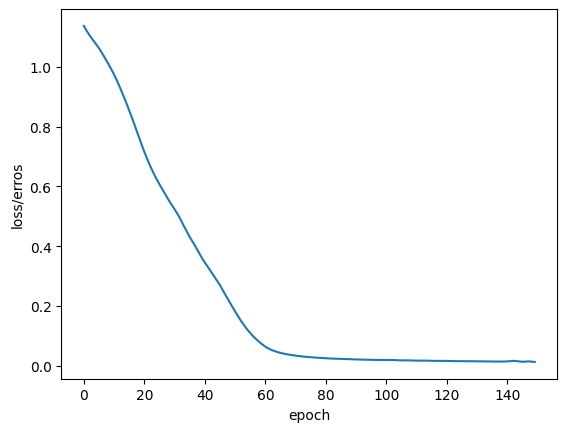

In [15]:
#Graph it out 

plt.plot(range(epochs), losses)

plt.ylabel("loss/erros")
plt.xlabel("epoch")